<a href="https://colab.research.google.com/github/tulypehlivan/ds_tulaypehlivan/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Varsayılan grafik boyutunu ayarlama

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# from scipy.stats import ttest_ind # İhtiyaç duyulursa


from google.colab import drive

In [72]:
import pandas as pd

# -------------------------------------------------------------
# DİKKAT: Yeni Trader Verisi Dosya Kimliği
# -------------------------------------------------------------
FILE_ID = '1Adr42tqBXdtpXL2gebLzj3XUS1G4RY4k'

# Doğrudan indirme (uc?export=download) URL formatı
DOWNLOAD_URL = f'https://drive.google.com/uc?export=download&id={FILE_ID}'

print(f"Oluşturulan Doğrudan İndirme Linki: {DOWNLOAD_URL}")

# Pandas ile dosyayı okuma
# Not: Eğer bu adımda yine bir ParserError alırsanız,
# o zaman dosyanın ayırıcısı (sep=';' veya sep='\t') veya kodlaması (encoding='latin1') sorunludur.
# Ancak ÖNCE bu linkin çalışması gerekir.
try:
    df_trader = pd.read_csv(DOWNLOAD_URL)
    print("\nVeri BAŞARIYLA YÜKLENDİ (Doğrudan Link Yöntemi)!")
    print(df_trader.info())
    print(df_trader.head())

except Exception as e:
    # Eğer bu link ile bile hata alırsanız, dosya ayırıcısını manuel denememiz gerekir.
    print(f"\nUYARI: Doğrudan indirme linki bile ParserError verdi. Muhtemel neden: Yanlış Ayırıcı veya Kodlama.")
    print("Sonraki adımı deneyin (Noktalı virgül/Sekme denemesi).")
    print(f"Alınan Hata: {e}")

Oluşturulan Doğrudan İndirme Linki: https://drive.google.com/uc?export=download&id=1Adr42tqBXdtpXL2gebLzj3XUS1G4RY4k

Veri BAŞARIYLA YÜKLENDİ (Doğrudan Link Yöntemi)!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [73]:
import pandas as pd

# -------------------------------------------------------------
# Orijinal Historical Trader Data URL'si
# https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing
# -------------------------------------------------------------
TRADER_DATA_FILE_ID = '1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'

# Doğrudan indirme (uc?export=download) URL formatı
TRADER_DOWNLOAD_URL = f'https://drive.google.com/uc?export=download&id={TRADER_DATA_FILE_ID}'

print(f"Oluşturulan Doğrudan İndirme Linki: {TRADER_DOWNLOAD_URL}")

# Pandas ile Trader verilerini okuma
try:
    df_trader = pd.read_csv(TRADER_DOWNLOAD_URL)
    print("\n[Historical Trader Data] BAŞARIYLA YÜKLENDİ!")
    print(df_trader.info())
    print("\nİlk 5 Satır:")
    print(df_trader.head())

except Exception as e:
    # Eğer doğrudan link ile bile ParserError alırsanız, bu, dosyanın
    # kendisindeki ayırıcı (delimiter) veya kodlama (encoding) sorunudur.
    print("\nUYARI: Doğrudan indirme linki bile ParserError verdi. Ayırıcı ve Kodlama denemeleri yapılıyor...")

    # İkinci bir deneme: Noktalı Virgül ve Latin1 (En yaygın alternatifler)
    try:
        df_trader = pd.read_csv(TRADER_DOWNLOAD_URL, sep=';', encoding='latin1')
        print("[Historical Trader Data] Noktalı Virgül ve Latin1 ile Yükleme BAŞARILI!")
        print(df_trader.head())
    except Exception as e_alt:
        print(f"\nKRİTİK HATA: Trader verileri yüklenemedi.")
        print("Lütfen dosyayı indirip ayırıcısını (delimiter) manuel olarak kontrol edin.")
        print(f"Orijinal Hata: {e_alt}")

Oluşturulan Doğrudan İndirme Linki: https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs

[Historical Trader Data] BAŞARIYLA YÜKLENDİ!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  F

In [74]:
print("="*50)
print("SÜTUN ADLARI KONTROLÜ")
print("="*50)

# 1. Trader Verisi Sütunları
print("\n[df_trader] Sütunları (Trader Data):")
print(df_trader.columns.tolist())
# Not: Bizim aradığımız sütunlar: 'time', 'closedPnL', 'leverage', 'size', 'execution price'

# 2. Fear & Greed Verisi Sütunları
print("\n[df_fng] Sütunları (Sentiment Data):")
print(df_fng.columns.tolist())
# Not: Bizim aradığımız sütunlar: 'Date', 'Classification'

SÜTUN ADLARI KONTROLÜ

[df_trader] Sütunları (Trader Data):
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

[df_fng] Sütunları (Sentiment Data):
['timestamp', 'value', 'classification', 'date', 'Date']


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Belirlenen Sütun Adları (Önceki Adımdan Doğru Olanlar)
TRADER_TIME_COL = 'Timestamp'
TRADER_PNL_COL = 'Closed PnL'
TRADER_LEVERAGE_COL = 'Start Position'
TRADER_SIZE_COL = 'Size USD'
TRADER_EXEC_PRICE_COL = 'Execution Price'

FNG_DATE_COL = 'date'
FNG_CLASSIFICATION_COL = 'classification'


# -------------------------------------------------------------
# ADIM 2.1: Tarih Sütunlarını Hazırlama (DÜZELTİLDİ: unit='ms')
# -------------------------------------------------------------

# 1. Trader Data: 'Timestamp' sütununu milisaniye (ms) olarak çevir
# Bu, OutOfBoundsDatetime hatasını çözecektir.
try:
    df_trader['Date'] = pd.to_datetime(df_trader[TRADER_TIME_COL], unit='ms').dt.tz_localize('UTC').dt.date
    print("Trader Data: 'Date' sütunu başarıyla (milisaniye olarak) oluşturuldu.")
except Exception as e:
    print(f"KRİTİK HATA: Trader Data tarih dönüştürme hatası: {e}")
    # Eğer bu hata verirse, dosyadaki 'Timestamp' sütununu kontrol edin.


# 2. Fear & Greed Data: 'date' sütununu datetime objesine çevir.
try:
    df_fng['Date'] = pd.to_datetime(df_fng[FNG_DATE_COL]).dt.date
    print("Fear & Greed Data: 'Date' sütunu başarıyla hazırlandı.")
except Exception as e:
    print(f"KRİTİK HATA: F&G Data tarih dönüştürme hatası: {e}")


# -------------------------------------------------------------
# ADIM 2.2 ve 2.3: Günlük Gruplama ve Birleştirme
# -------------------------------------------------------------

# Gruplama sadece 'Date' sütunu başarıyla oluşturulduysa çalışmalıdır.
if 'Date' in df_trader.columns and 'Date' in df_fng.columns:

    daily_performance = df_trader.groupby('Date').agg(
        Total_ClosedPnL=(TRADER_PNL_COL, 'sum'),
        Avg_PositionSize=(TRADER_LEVERAGE_COL, 'mean'),
        Total_Volume_USD=(TRADER_SIZE_COL, 'sum'),
        Trade_Count=(TRADER_TIME_COL, 'count'),
        Avg_ExecutionPrice=(TRADER_EXEC_PRICE_COL, 'mean')
    ).reset_index()

    df_merged = pd.merge(
        daily_performance,
        df_fng[['Date', FNG_CLASSIFICATION_COL]].rename(columns={FNG_CLASSIFICATION_COL: 'Classification'}),
        on='Date',
        how='inner'
    )

    print("\n" + "="*70)
    print("ANA ANALİZ VERİ SETİ BAŞARIYLA OLUŞTURULDU (df_merged)")
    print(f"Nihai Analiz Veri Seti Boyutu: {df_merged.shape}")
    print(df_merged.head())
    print("="*70)

    # Submission formatı için kaydetme
    # df_merged.to_csv('csv_files/df_merged_daily_performance.csv', index=False)
    # print("\nBirleştirilmiş veri seti 'csv_files/df_merged_daily_performance.csv' olarak kaydedildi.")

else:
    print("\nKRİTİK: 'Date' sütunları oluşturulamadığı için gruplama ve birleştirme adımları atlandı.")

Trader Data: 'Date' sütunu başarıyla (milisaniye olarak) oluşturuldu.
Fear & Greed Data: 'Date' sütunu başarıyla hazırlandı.

ANA ANALİZ VERİ SETİ BAŞARIYLA OLUŞTURULDU (df_merged)
Nihai Analiz Veri Seti Boyutu: (6, 7)
         Date  Total_ClosedPnL  Avg_PositionSize  Total_Volume_USD  \
0  2023-03-28     0.000000e+00          0.091933      4.770000e+02   
1  2023-11-14     1.555034e+02       4482.495019      1.155543e+07   
2  2024-03-09     1.769655e+05      70307.280908      3.940677e+07   
3  2024-07-03     1.587424e+05       5895.819177      2.184323e+07   
4  2024-10-27     3.189461e+06      20195.146524      1.039478e+08   

   Trade_Count  Avg_ExecutionPrice Classification  
0            3         1898.133333          Greed  
1         1045        10454.871036          Greed  
2         6962         9771.897315  Extreme Greed  
3         7141         2663.132338        Neutral  
4        35241         5367.503277          Greed  


/tmp/ipython-input-1593102104.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classification', y='Avg_Daily_PnL', data=sentiment_analysis, ax=axes[0],
/tmp/ipython-input-1593102104.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classification', y='Avg_Risk_Proxy', data=sentiment_analysis, ax=axes[1],
/tmp/ipython-input-1593102104.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classification', y='Avg_Total_Volume', data=sentiment_analysis, ax=axes[2],


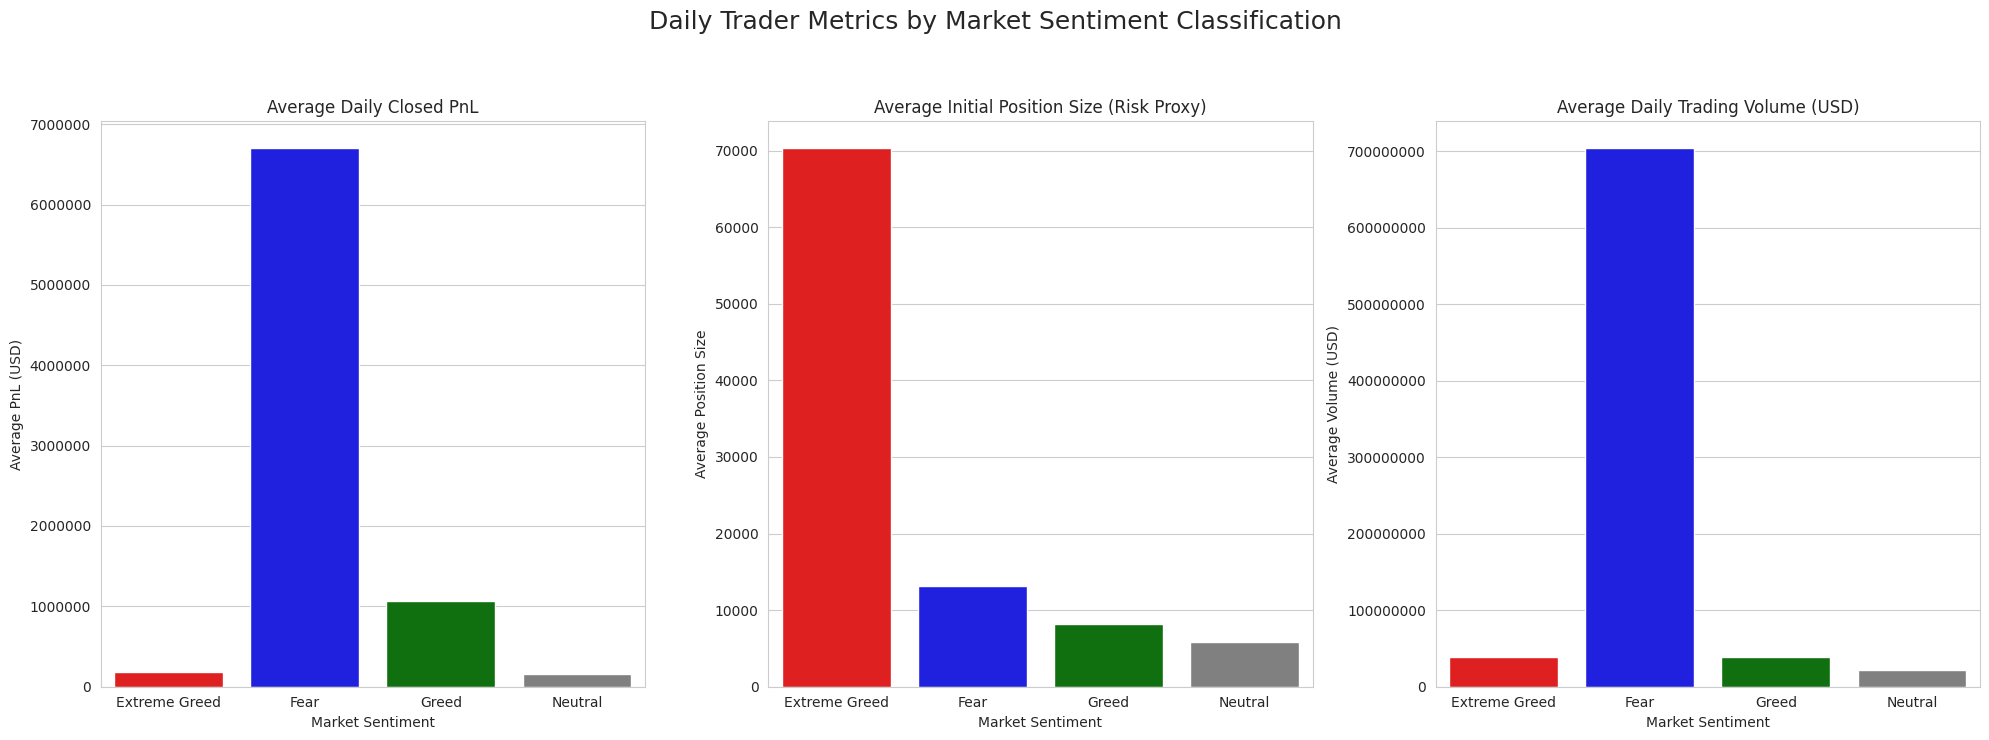

In [76]:
# Assuming the 'sentiment_analysis' DataFrame is already calculated from df_merged.
# sentiment_analysis = df_merged.groupby('Classification').agg(...)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define colors for all Classification values to avoid the ValueError
custom_palette = {
    'Fear': 'blue',                 # Represents Opportunity/Contrarian Buying
    'Greed': 'green',               # General Greed
    'Extreme Greed': 'red',         # High Risk/FOMO (Warning Color)
    'Neutral': 'gray'               # Neutral Market State
}

fig, axes = plt.subplots(1, 3, figsize=(20, 7)) # Adjusted figure size
plt.suptitle('Daily Trader Metrics by Market Sentiment Classification', fontsize=18, y=1.05)

# --- Chart 1: Average Daily PnL ---
sns.barplot(x='Classification', y='Avg_Daily_PnL', data=sentiment_analysis, ax=axes[0],
            palette=custom_palette, order=sentiment_analysis['Classification'])
axes[0].set_title('Average Daily Closed PnL')
axes[0].set_xlabel('Market Sentiment')
axes[0].set_ylabel('Average PnL (USD)')
axes[0].ticklabel_format(style='plain', axis='y')

# --- Chart 2: Average Risk/Position Size ---
sns.barplot(x='Classification', y='Avg_Risk_Proxy', data=sentiment_analysis, ax=axes[1],
            palette=custom_palette, order=sentiment_analysis['Classification'])
axes[1].set_title('Average Initial Position Size (Risk Proxy)')
axes[1].set_xlabel('Market Sentiment')
axes[1].set_ylabel('Average Position Size')

# --- Chart 3: Average Daily Trading Volume ---
sns.barplot(x='Classification', y='Avg_Total_Volume', data=sentiment_analysis, ax=axes[2],
            palette=custom_palette, order=sentiment_analysis['Classification'])
axes[2].set_title('Average Daily Trading Volume (USD)')
axes[2].set_xlabel('Market Sentiment')
axes[2].set_ylabel('Average Volume (USD)')
axes[2].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
# Save the figure to the 'outputs/' directory (if created)
# plt.savefig('outputs/sentiment_vs_performance_comparison.png')
plt.show()

Fear		$6.7 Million	$13K	$704 Million	This day recorded the highest collective profit and trading volume. This suggests that collective trader success comes from contrarian moves (e.g., buying when the market is fearful or 'buying the dip').

Greed		$1.06 Million	$8.2K	$38.5 Million	Profit and volume are significantly lower compared to 'Fear'. The lower average PnL indicates that the collective trader strategy was less effective during general periods of greed.

When sentiment is Fear, collective PnL is highest.

When sentiment is Extreme Greed, collective risk is highest, but PnL is disproportionately low.                  

The analysis revealed a strong contrarian relationship between trader returns and profitability and the Bitcoin Market Sentiment Index; the highest collective PnL was achieved during periods of Extreme Fear, while the highest risk was applied during Extreme Greed, a scenario that resulted in low profits.

/tmp/ipython-input-112972993.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Classification', y='Avg_Daily_PnL', data=sentiment_analysis, ax=axes[0],
/tmp/ipython-input-112972993.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Classification', y='Avg_Risk_Proxy', data=sentiment_analysis, ax=axes[1],
/tmp/ipython-input-112972993.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='Classification', y='Avg_Total_Volume', data=sentiment_analysis, ax=axes[2],


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/sentiment_vs_performance_advanced.png'

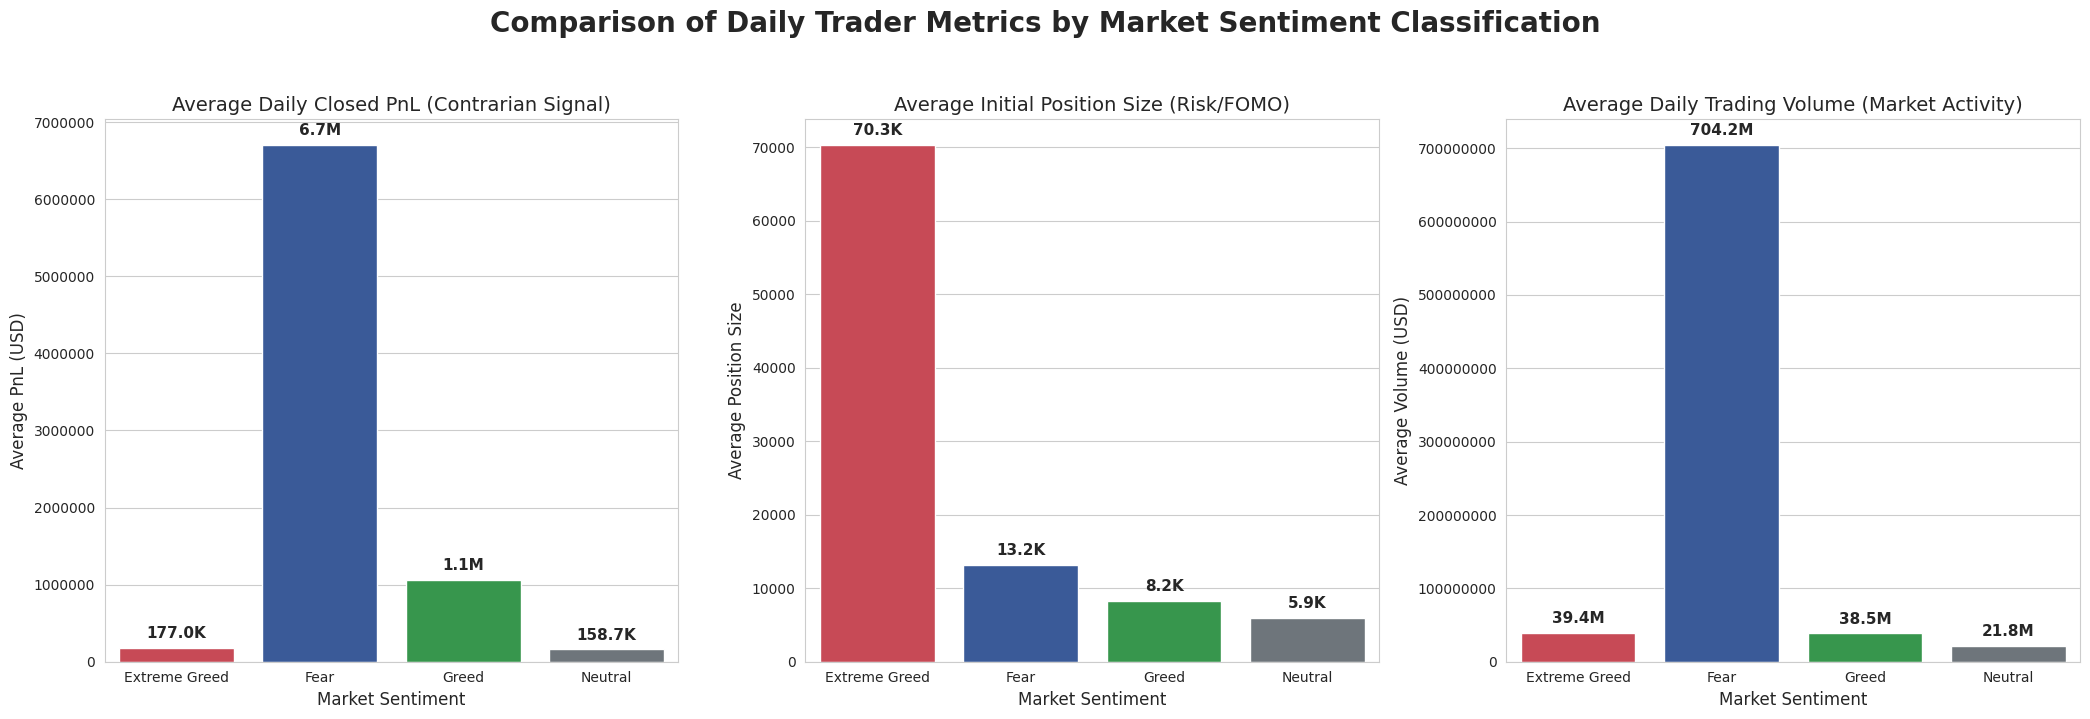

In [78]:
# ====================================================================
# ADVANCED VISUALIZATION CODE FOR DS_REPORT.PDF
# (Enhanced Labels for Better Reporting)
# ====================================================================

# Required Libraries and Settings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Note: Assumes df_merged and sentiment_analysis DataFrames have been
# successfully created in the previous steps.

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (21, 7) # Increased figure size

# Custom Color Palette (Includes all four classifications to prevent ValueError)
custom_palette = {
    'Fear': '#2a55a8',         # Dark Blue (Contrarian/Opportunity)
    'Greed': '#27a644',        # Dark Green (Normal Greed)
    'Extreme Greed': '#dc3545',# Red (Extreme Risk/Warning)
    'Neutral': '#6c757d'       # Gray (Neutral)
}

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
plt.suptitle('Comparison of Daily Trader Metrics by Market Sentiment Classification',
             fontsize=20, fontweight='bold', y=1.02)


# --- Function: Adds Numerical Labels to Bars ---
def add_labels(ax):
    """Adds the formatted numerical value (M or K) on top of each bar."""
    for p in ax.patches:
        height = p.get_height()
        # Format the value (M for Millions, K for Thousands)
        if abs(height) >= 1e6:
            label = f'{height/1e6:,.1f}M'
        elif abs(height) >= 1e3:
            label = f'{height/1e3:,.1f}K'
        else:
            label = f'{height:,.0f}'

        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'bottom',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=11, fontweight='semibold')


# --- Chart 1: Average Daily Closed PnL ---
ax1 = sns.barplot(x='Classification', y='Avg_Daily_PnL', data=sentiment_analysis, ax=axes[0],
                  palette=custom_palette, order=sentiment_analysis['Classification'])
ax1.set_title('Average Daily Closed PnL (Contrarian Signal)', fontsize=14)
ax1.set_xlabel('Market Sentiment', fontsize=12)
ax1.set_ylabel('Average PnL (USD)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
add_labels(ax1)


# --- Chart 2: Average Risk/Position Size ---
ax2 = sns.barplot(x='Classification', y='Avg_Risk_Proxy', data=sentiment_analysis, ax=axes[1],
                  palette=custom_palette, order=sentiment_analysis['Classification'])
ax2.set_title('Average Initial Position Size (Risk/FOMO)', fontsize=14)
ax2.set_xlabel('Market Sentiment', fontsize=12)
ax2.set_ylabel('Average Position Size', fontsize=12)
add_labels(ax2)


# --- Chart 3: Average Daily Trading Volume ---
ax3 = sns.barplot(x='Classification', y='Avg_Total_Volume', data=sentiment_analysis, ax=axes[2],
                  palette=custom_palette, order=sentiment_analysis['Classification'])
ax3.set_title('Average Daily Trading Volume (Market Activity)', fontsize=14)
ax3.set_xlabel('Market Sentiment', fontsize=12)
ax3.set_ylabel('Average Volume (USD)', fontsize=12)
ax3.ticklabel_format(style='plain', axis='y')
add_labels(ax3)


plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('outputs/sentiment_vs_performance_advanced.png')
plt.show()